In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
from ff_energy.ffe.slurm import SlurmJobHandler
from pathlib import Path
import pandas as pd
import jax.numpy as jnp
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ff_energy.ffe.potential import (
    LJ,
    DE,
)
from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import FFEPATH, PDB_PATH
from ff_energy.plotting.ffe_plots import plot_energy_MSE, plot_ff_fit
from ff_energy.plotting.plotting import set_style
from ff_energy.plotting.fit_results import residuals_plot, residuals_from_keys
from ff_energy.logs.logging import hide_logs
from ff_energy.ffe.potential import LJ, LJ_bound, DE

hide_logs()
import scienceplots
set_style(no_latex=True)

from ff_energy.ffe.ff_fit import (
    load_ff,
    fit_func,
    fit_repeat,
)

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, PKL_PATH
from ff_energy.utils.json_utils import load_json
from ff_energy.ffe.structure import atom_key_pairs

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, \
    PKL_PATH, get_structures

from sklearn.metrics import mean_squared_error as calc_rmse


0 ('C', 'C')
1 ('C', 'CG331')
2 ('C', 'CL')
3 ('C', 'CLA')
4 ('C', 'H')
5 ('C', 'HGA3')
6 ('C', 'HGP1')
7 ('C', 'HT')
8 ('C', 'OG311')
9 ('C', 'OT')
10 ('C', 'POT')
11 ('CG331', 'CG331')
12 ('CG331', 'CL')
13 ('CG331', 'CLA')
14 ('CG331', 'H')
15 ('CG331', 'HGA3')
16 ('CG331', 'HGP1')
17 ('CG331', 'HT')
18 ('CG331', 'OG311')
19 ('CG331', 'OT')
20 ('CG331', 'POT')
21 ('CL', 'CL')
22 ('CL', 'CLA')
23 ('CL', 'H')
24 ('CL', 'HGA3')
25 ('CL', 'HGP1')
26 ('CL', 'HT')
27 ('CL', 'OG311')
28 ('CL', 'OT')
29 ('CL', 'POT')
30 ('CLA', 'CLA')
31 ('CLA', 'H')
32 ('CLA', 'HGA3')
33 ('CLA', 'HGP1')
34 ('CLA', 'HT')
35 ('CLA', 'OG311')
36 ('CLA', 'OT')
37 ('CLA', 'POT')
38 ('H', 'H')
39 ('H', 'HGA3')
40 ('H', 'HGP1')
41 ('H', 'HT')
42 ('H', 'OG311')
43 ('H', 'OT')
44 ('H', 'POT')
45 ('HGA3', 'HGA3')
46 ('HGA3', 'HGP1')
47 ('HGA3', 'HT')
48 ('HGA3', 'OG311')
49 ('HGA3', 'OT')
50 ('HGA3', 'POT')
51 ('HGP1', 'HGP1')
52 ('HGP1', 'HT')
53 ('HGP1', 'OG311')
54 ('HGP1', 'OT')
55 ('HGP1', 'POT')
56 ('HT', 'HT'

<Figure size 100x100 with 0 Axes>

In [2]:
# PKLPATH = Path("/home/boittier/Documents/phd/ff_energy/pickles/")
# pd.read_csv(PKLPATH / "ELECmpol_water_cluster_lj_elec.csv")

#  Old FF objects

In [3]:
FFOBJ = pd.read_pickle(
    "/home/boittier/Documents/phd/ff_energy/pickles/ELECp_ions_ext_lj_intE_fitted.pkl")

In [4]:
FFOBJ.bounds

[(0.1, 5.5),
 (0.1, 5.5),
 (0.1, 5.5),
 (0.1, 5.5),
 (0.001, 0.1),
 (0.001, 0.1),
 (0.001, 0.1),
 (0.001, 0.1)]

In [5]:
FFOBJ.atom_types

['CLA', 'HT', 'OT', 'POT']

In [6]:
FFOBJ.get_best_parm()

array([1.89870963e+00, 2.49904612e+00, 1.46393915e+00, 9.00892334e-01,
       1.00000000e-03, 1.00067511e-03, 1.17324839e-03, 5.23727070e-03])

In [51]:
b = FFOBJ.get_best_parm()
FFOBJ.get_best_parm()
print(f"{b[1]:.4f} & {b[2]:.4f} & {b[3]:.4f} & {b[5]:.4f} & {b[6]:.4f} & {b[7]:.4f}")
print(f"{b[1]:.4f} & {b[2]:.4f} & {b[0]:.4f} & {b[5]:.4f} & {b[6]:.4f} & {b[4]:.4f}")

2.4990 & 1.4639 & 0.9009 & 0.0010 & 0.0012 & 0.0052
2.4990 & 1.4639 & 1.8987 & 0.0010 & 0.0012 & 0.0010


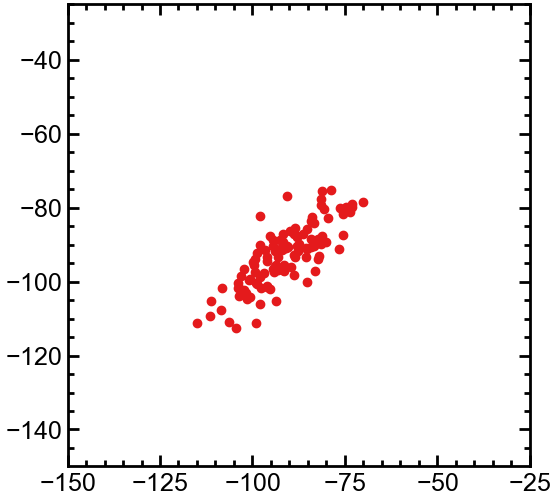

In [7]:
plt.scatter(FFOBJ.targets + FFOBJ.data.ELECp, 
            FFOBJ.opt_results_df[0][0] + FFOBJ.data.ELECp)
plt.xlim(-150, -25.0)
plt.ylim(-150, -25.0)
plt.gca().set_aspect('equal')

In [8]:
pd.DataFrame(FFOBJ.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
59,21.293474,2764,4132,0,True,Optimization terminated successfully.,"[1.8987096310556173, 2.4990461237807917, 1.463...","([[1.8987096310556173, 2.4990461237807917, 1.4..."
67,21.325718,1457,2170,0,True,Optimization terminated successfully.,"[1.8437766596387055, 2.5178014686773826, 1.463...","([[1.8437766596387055, 2.5178014686773826, 1.4..."
80,21.400326,1394,2155,0,True,Optimization terminated successfully.,"[0.49418883008838216, 1.5902162860805293, 2.52...","([[0.49418883008838216, 1.5902162860805293, 2...."
98,21.406542,1121,1773,0,True,Optimization terminated successfully.,"[0.49046442029146986, 1.5885663543745598, 2.52...","([[0.49046442029146986, 1.5885663543745598, 2...."
35,21.441751,1858,2808,0,True,Optimization terminated successfully.,"[0.48778869497028976, 1.593110347305247, 2.540...","([[0.48778869497028976, 1.593110347305247, 2.5..."
...,...,...,...,...,...,...,...,...
54,96.949478,457,721,0,True,Optimization terminated successfully.,"[0.1, 1.9152931995952827, 0.1, 0.1, 0.09999999...","([[0.1, 1.9152931995952827, 0.1, 0.1, 0.099999..."
62,126.291237,123,313,0,True,Optimization terminated successfully.,"[0.1553102393015169, 0.12751455672334974, 0.11...","([[0.1553102393015169, 0.12751455672334974, 0...."
33,126.291275,109,263,0,True,Optimization terminated successfully.,"[0.1, 0.1, 0.1, 0.1, 0.09888102637195578, 0.09...","([[0.1, 0.1, 0.1, 0.1, 0.09888102637195578, 0...."
21,126.291328,104,267,0,True,Optimization terminated successfully.,"[0.1, 0.1, 0.1, 0.1, 0.09565930501794412, 0.1,...","([[0.1, 0.1, 0.1, 0.1, 0.09565930501794412, 0...."


In [9]:
# just_k_data = FFOBJ.data[FFOBJ.data["ion"] == "POT"].copy()
# # just_cl_data

In [4]:
# just_k_dists = {k:v for k, v in FFOBJ.dists.items() if k.upper() in list(FFOBJ.data[FFOBJ.data["ion"] == "POT"].index)}

In [13]:
# dists = {str(s.name)[:-4]: s.distances for s in structs}

# struct_data = structs[0]
# sig_bound = (0.0025, 5.5)
# ep_bound = (0.001, 1.0)
# alpha_bound = (1, 8)
# beta_bound = (2, 14)
# FUNC = LJ
# BOUNDS = LJ_bound
# elec = "ELEC"
# target = "intE"

In [14]:
# data_.loc[names]
# LJ_bound

In [15]:
# TESTCLA_ljpcff = FF(
#     just_k_data, # pd.DataFrame
#     just_k_dists, #
#     FUNC, #
#     [(0,1) for _ in range(6)], # tuple
#     struct_data, 
#     elec=elec,
#     intE=target,
# )
# #  set the targets
# TESTCLA_ljpcff.num_segments = len(just_k_data)
# print("Nsegments", TESTCLA_ljpcff.num_segments)
# TESTCLA_ljpcff.set_targets()

In [16]:
# TESTCLA_ljpcff_fit = fit_repeat(TESTCLA_ljpcff,
#              10,
#              "test",
#              loss="jax",
#             quiet=False)

In [17]:
# pd.DataFrame(TESTCLA_ljpcff_fit.opt_results).sort_values("fun").iloc[0]

In [18]:
# ljpcff_fit = fit_repeat(FFOBJ,
#              2,
#              "test",
#              loss="jax",
#             quiet=False)

In [19]:
# plt.hist(FFOBJ.targets)

# Mike's Data

In [10]:
polE = [-0.414108045672691,
-3.18751925572136,
-0.135589440516043,
-6.50420378424246,
-5.08720706684926,
-0.847746264614244,
-2.88719922192413,
1.23023692162019,
2.34732370863043,
2.42284220912128,
0.918818910952268,
-7.02516712813826,
-2.94324580629078,
-1.90211349555901,
1.40281740816175,
0.533864995459993,
-3.80231412297786,
-2.13240211849146,
0.085510269966079,
-0.34770746468962,
# 2.12613296059692,
# -0.247729935513746,
# 1.47343723895722,
# 3.18660071579751,
# -1.45335918792424,
# 1.25973868174952,
# 1.6957922311253,
# -1.51233214772702,
# 1.37607082667697,
# 3.27774245735662,
# -2.53773459790372
       ]

In [11]:
ciE = [-172.294748700473,
-162.753901968924,
-161.600709456013,
-177.597983623278,
-195.571327086928,
-157.175740278685,
-173.45650867918,
-179.84902864648,
-160.935151740573,
-167.504171516421,
-163.12057492246,
-188.237766971484,
-177.5333343772,
-173.981065221248,
-178.015983956155,
-177.969325403712,
-178.345772709696,
-173.566174889506,
-151.980813822351,
-144.433456643724,
# -156.096085287681,
# -164.732736539375,
# -173.57415384982,
# -157.751438562752,
# -176.33060276309,
# -162.167001889172,
# -141.865838628083,
# -144.00915397662,
# -156.640545132153,
# -159.762448589636,
# -160.441112581321,
      ]

#  New structures

In [12]:
data1 = pd.read_pickle(
    "/home/boittier/Documents/phd/ff_energy/pickles/pot_test_pbe0dz_pc.pkl")

In [13]:
data_1 = data1.data
data_1.index = data_1.KEY

In [14]:
structure1 = "pot_test"
structs1, _ = get_structures(structure1,
                            pdbpath=PDB_PATH / structure1)

Structure/PDB already already exists, loading from pickle
Structures/PDBs loaded 28 28


In [15]:
data_1.sort_index()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol
KEY,,,,,,,,,
POT_0_0,21.82734,-94.51291,19.53986,POT_0_0,-1515.867824,13,-1515.992999,-78.547563,-951290.154858
POT_10_10,21.21243,-89.48986,8.94447,POT_10_10,-1515.872198,13,-1516.013250,-88.510258,-951302.862427
POT_11_11,19.61882,-86.16030,12.63596,POT_11_11,-1515.874577,13,-1515.993924,-74.890444,-951290.735235
POT_12_12,18.63329,-91.47022,12.44096,POT_12_12,-1515.874702,13,-1516.012145,-86.245995,-951302.168848
POT_13_13,20.18720,-88.13878,16.86759,POT_13_13,-1515.875294,13,-1516.011288,-85.336260,-951301.631053
POT_14_14,16.41243,-92.37765,16.50018,POT_14_14,-1515.879971,13,-1516.014047,-84.133312,-951303.362616
POT_15_15,20.45611,-87.91368,12.31802,POT_15_15,-1515.871409,13,-1516.012076,-88.269021,-951302.125488
POT_16_16,19.64130,-96.85808,18.19235,POT_16_16,-1515.867367,13,-1516.003633,-85.507587,-951296.827725
POT_17_17,19.51778,-96.81038,18.65028,POT_17_17,-1515.869895,13,-1516.009931,-87.873613,-951300.780027


In [16]:
data2 = pd.read_pickle(
    "/home/boittier/Documents/phd/ff_energy/pickles/cla_test_pbe0dz_pc.pkl")

In [17]:
data_2 = data2.data
data_2.index = data_2.KEY

In [18]:
structure2 = "cla_test"
structs2, _ = get_structures(structure2,
                            pdbpath=PDB_PATH / structure2)

Structure/PDB already already exists, loading from pickle
Structures/PDBs loaded 20 20


In [19]:
data_2.sort_index()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol
KEY,,,,,,,,,
CLA_0_0,19.12459,-116.03635,19.34920,CLA_0_0,-1376.416247,13,-1376.581053,-103.415858,-863808.740294
CLA_10_10,23.76114,-105.44607,16.92126,CLA_10_10,-1376.405876,13,-1376.561974,-97.952108,-863796.768452
CLA_11_11,19.03492,-114.50993,21.37754,CLA_11_11,-1376.414714,13,-1376.589098,-109.426257,-863813.788831
CLA_12_12,20.67121,-106.28946,16.47598,CLA_12_12,-1376.413713,13,-1376.578023,-103.105382,-863806.839443
CLA_13_13,21.81382,-108.63187,14.10333,CLA_13_13,-1376.404228,13,-1376.571877,-105.199648,-863802.982226
CLA_14_14,19.22999,-112.99155,16.63419,CLA_14_14,-1376.414614,13,-1376.577958,-102.499032,-863806.798341
CLA_15_15,21.41101,-113.25211,16.82913,CLA_15_15,-1376.411935,13,-1376.583430,-107.613520,-863810.232013
CLA_16_16,18.92466,-119.65307,16.36383,CLA_16_16,-1376.410314,13,-1376.585873,-110.163762,-863811.765266
CLA_17_17,22.28554,-113.36461,15.41535,CLA_17_17,-1376.405563,13,-1376.576547,-107.292879,-863805.912934


In [20]:
combinedData = pd.concat([data_1, data_2])
# combinedData

In [21]:
combinedStructs = [*structs1, *structs2]

In [22]:
names = ["CLA_0_0",
"CLA_1_1",
"CLA_2_2",
"CLA_3_3",
"CLA_4_4",
"CLA_5_5",
"CLA_6_6",
"CLA_7_7",
"CLA_8_8",
"CLA_9_9",
"CLA_10_10",
"CLA_11_11",
"CLA_12_12",
"CLA_13_13",
"CLA_14_14",
"CLA_15_15",
"CLA_16_16",
"CLA_17_17",
"CLA_18_18",
"CLA_19_19",
# "CLA_20_20",
# "CLA_21_21",
# "CLA_22_22",
# "CLA_23_23",
# "CLA_24_24",
# "CLA_25_25",
# "CLA_26_26",
# "CLA_27_27",
# "CLA_28_28",
# "CLA_29_29",
# "CLA_30_30",
        ]

In [23]:
combindedDists = {str(s.name)[:-4]: s.distances for s in combinedStructs}

struct_data = combinedStructs[0]
sig_bound = (0.0025, 5.5)
ep_bound = (0.001, 1.0)
alpha_bound = (1, 8)
beta_bound = (2, 14)
FUNC = LJ
BOUNDS = LJ_bound
elec = "ELEC"
target = "intE"

In [24]:
if "CLA" not in struct_data.restypes:
    struct_data.restypes.append("CLA")
    struct_data.restypes[0] = "CLA"
    print(struct_data.restypes[0])
# struct_data.restypes
if "CLA" not in struct_data.atomnames:
    struct_data.atomnames[0] = "CLA"


CLA


In [25]:
print(struct_data.restypes)

['CLA', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'POT', 'CLA']


In [26]:
# struct_data.atomnames

In [27]:
# data_.loc[names]
LJ_bound

[(0.05, 4.0), (0.05, 4.0), (1e-05, 1.0), (1e-05, 1.0)]

In [28]:
ljpcff = FF(
    combinedData, # pd.DataFrame
    combindedDists, #
    FUNC, #
    [(0,1) for _ in range(8)], # tuple
    struct_data, 
    elec=elec,
    intE=target,
)
#  set the targets
ljpcff.num_segments = len(combinedData)
print("Nsegments", ljpcff.num_segments)
ljpcff.set_targets()

Atom types: ['HT', 'OT', 'POT', 'CLA']
Atom types: ['CLA', 'HT', 'OT', 'POT']
Atom types: ['CLA', 'HT', 'OT', 'POT']
Atom type pairs: [('CLA', 'CLA'), ('CLA', 'HT'), ('CLA', 'OT'), ('CLA', 'POT'), ('HT', 'HT'), ('HT', 'OT'), ('HT', 'POT'), ('OT', 'OT'), ('OT', 'POT'), ('POT', 'POT')]
setting random parameters
Getting 8 random parameters
bounds:
[(0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1)]
Interaction energy:
KEY
CLA_0_0     -103.415858
CLA_10_10    -97.952108
CLA_11_11   -109.426257
CLA_12_12   -103.105382
CLA_13_13   -105.199648
CLA_14_14   -102.499032
CLA_15_15   -107.613520
CLA_16_16   -110.163762
CLA_17_17   -107.292879
CLA_18_18    -94.664299
CLA_19_19    -92.021307
CLA_1_1     -112.650048
CLA_2_2     -106.141266
CLA_3_3     -107.818300
CLA_4_4     -110.380281
CLA_5_5     -109.112675
CLA_6_6     -109.481339
CLA_7_7     -101.390303
CLA_8_8     -100.377068
CLA_9_9      -96.752736
POT_0_0      -78.547563
POT_10_10    -88.510

In [29]:
# a,b,c = ljpcff.eval_jax([0.36058475, 1.74046017, 0.1, 0.1])
# a,b,c = ljpcff.eval_jax([ 0.1, 0.1, 0.36058475, 1.74046017,])

In [32]:
# OT     0.00  -0.1521  1.7682 ! ALLOW   WAT
# HT     0.00  -0.0460  0.2245 ! ALLOW WAT


In [33]:
# tip3
# a,b,c = ljpcff.eval_jax([ 
#         0.2245,
#         1.7682, 
#         0.0460, 
#         0.1521, 
# ])
a,b,c = ljpcff.eval_jax(
[1.89870963e+00, 2.49904612e+00, 1.46393915e+00, 9.00892334e-01,
1.00000000e-03, 1.00067511e-03, 1.17324839e-03, 5.23727070e-03]
                         )

In [34]:
a

Array([13.5178385,  9.70841  ,  9.814937 ,  9.735972 ,  9.052647 ,
        9.301503 ,  9.021381 ,  9.46093  ,  8.229654 ,  7.7480373,
       10.125705 ,  6.517525 ,  8.038034 , 11.06257  , 12.13117  ,
        5.6803737,  7.436456 ,  9.670217 ,  6.9054956,  9.147624 ,
        7.95494  ,  5.493089 , 14.496087 ,  4.2132297, 11.291304 ,
        7.6499166,  5.509627 , 10.802038 , 10.489372 , 10.487508 ,
        7.0919104, 12.231165 ,  7.6891146,  7.935557 , 14.952925 ,
       10.9196415,  9.936393 ,  6.034195 ,  4.745502 ,  6.5234737,
        6.313522 ,  9.391559 ,  9.149102 ,  8.986602 ,  5.530459 ,
       11.367776 ,  4.9246674,  6.8106174], dtype=float32)

In [35]:
a_,b_,c_ = FFOBJ.eval_jax([1.89870963e+00, 2.49904612e+00, 1.46393915e+00, 9.00892334e-01,
       1.00000000e-03, 1.00067511e-03, 1.17324839e-03, 5.23727070e-03])
a_

Array([22.574469 ,  9.074636 ,  4.4700484, 10.86132  ,  5.4801106,
        9.125593 ,  6.385825 , 10.304658 , 12.070015 , 11.072428 ,
       10.490596 ,  9.2500725,  6.8061547,  5.4968524,  6.5320992,
       11.321433 ,  7.654702 ,  8.20705  ,  7.861574 , 10.807115 ,
        8.380394 , 10.494856 ,  7.2589536,  7.0949106,  9.432262 ,
        9.39661  ,  9.156191 , 13.356741 , 10.230818 ,  5.528767 ,
        7.0893636, 11.368005 , 10.532068 ,  8.139096 ,  8.087753 ,
        7.9359336,  7.63169  , 10.937242 , 19.063187 ,  7.53798  ,
        6.30353  ,  4.741537 ,  7.581398 ,  5.7388086, 12.800904 ,
       10.104998 ,  9.749247 ,  7.861291 ,  7.0116105, 10.876724 ,
       10.852463 ,  5.640131 , 23.695873 ,  7.0165815, 10.525339 ,
       12.360449 , 12.818221 ,  8.865872 ,  9.8312645,  8.041536 ,
       11.501702 ,  5.6431456, 11.104328 , 10.7884   ,  5.6160274,
        5.5148787,  8.847982 , 16.636469 , 11.564121 ,  4.6252246,
        9.637035 , 12.14283  , 10.477562 ,  7.9174285, 11.5150

In [36]:
ljpcff.targets

Array([12.620491  ,  7.4939575 ,  5.083679  ,  3.1840744 ,  3.4322205 ,
       10.492516  ,  5.6385956 ,  9.489304  ,  6.0717316 ,  5.444504  ,
        5.4553604 , -4.2818756 ,  3.667076  ,  8.121002  ,  7.428581  ,
       -2.1667023 ,  3.52993   , 11.360535  ,  6.273575  , 10.9291    ,
       15.965347  ,  0.979599  , 11.269859  ,  5.224228  ,  2.8025208 ,
        8.244339  , -0.35533905, 11.350494  ,  8.936768  ,  8.805428  ,
       15.500168  , 20.473907  , 11.582283  ,  5.313286  ,  2.0133286 ,
       14.557045  , 16.18808   , 11.797844  ,  6.1699295 ,  4.6670303 ,
        3.260933  ,  8.710617  , 15.735001  , 10.333847  ,  8.1755905 ,
        9.720345  ,  2.6363754 , 13.243988  ], dtype=float32)

(array([ 2.,  1.,  4., 11.,  6., 10.,  7.,  3.,  3.,  1.]),
 array([-4.2818756, -1.8062973,  0.669281 ,  3.1448593,  5.6204376,
         8.096016 , 10.571594 , 13.047173 , 15.522751 , 17.99833  ,
        20.473907 ], dtype=float32),
 <BarContainer object of 10 artists>)

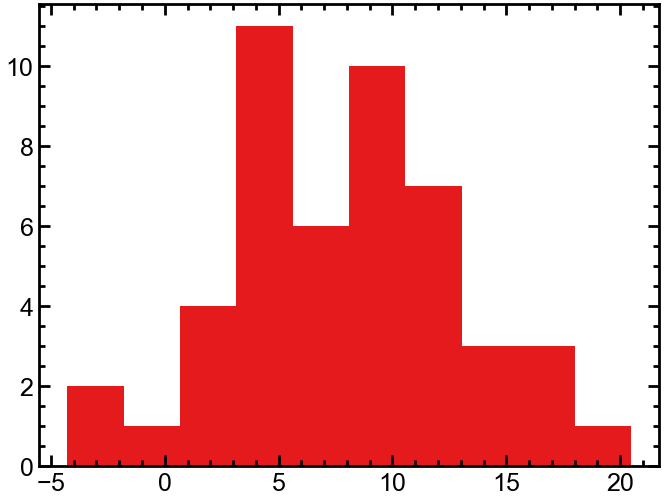

In [37]:
plt.hist(ljpcff.targets)

In [38]:
# datacopy.loc[names]

In [39]:
datacopy = ljpcff.data.copy()
datacopy["fitE"] = a
datacopy["target"] = ljpcff.targets
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target
KEY,,,,,,,,,,,,
CLA_0_0,19.12459,-116.03635,19.34920,CLA_0_0,-1376.416247,13,-1376.581053,-103.415858,-863808.740294,0.0,13.517838,12.620491
CLA_10_10,23.76114,-105.44607,16.92126,CLA_10_10,-1376.405876,13,-1376.561974,-97.952108,-863796.768452,0.0,9.708410,7.493958
CLA_11_11,19.03492,-114.50993,21.37754,CLA_11_11,-1376.414714,13,-1376.589098,-109.426257,-863813.788831,0.0,9.814937,5.083679
CLA_12_12,20.67121,-106.28946,16.47598,CLA_12_12,-1376.413713,13,-1376.578023,-103.105382,-863806.839443,0.0,9.735972,3.184074
CLA_13_13,21.81382,-108.63187,14.10333,CLA_13_13,-1376.404228,13,-1376.571877,-105.199648,-863802.982226,0.0,9.052647,3.432220
CLA_14_14,19.22999,-112.99155,16.63419,CLA_14_14,-1376.414614,13,-1376.577958,-102.499032,-863806.798341,0.0,9.301503,10.492516
CLA_15_15,21.41101,-113.25211,16.82913,CLA_15_15,-1376.411935,13,-1376.583430,-107.613520,-863810.232013,0.0,9.021381,5.638596
CLA_16_16,18.92466,-119.65307,16.36383,CLA_16_16,-1376.410314,13,-1376.585873,-110.163762,-863811.765266,0.0,9.460930,9.489304
CLA_17_17,22.28554,-113.36461,15.41535,CLA_17_17,-1376.405563,13,-1376.576547,-107.292879,-863805.912934,0.0,8.229654,6.071732


In [40]:
# datacopy = datacopy.loc[names]
# datacopy["EPOL"] = polE
# datacopy["ECI"] = ciE

In [41]:
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target
KEY,,,,,,,,,,,,
CLA_0_0,19.12459,-116.03635,19.34920,CLA_0_0,-1376.416247,13,-1376.581053,-103.415858,-863808.740294,0.0,13.517838,12.620491
CLA_10_10,23.76114,-105.44607,16.92126,CLA_10_10,-1376.405876,13,-1376.561974,-97.952108,-863796.768452,0.0,9.708410,7.493958
CLA_11_11,19.03492,-114.50993,21.37754,CLA_11_11,-1376.414714,13,-1376.589098,-109.426257,-863813.788831,0.0,9.814937,5.083679
CLA_12_12,20.67121,-106.28946,16.47598,CLA_12_12,-1376.413713,13,-1376.578023,-103.105382,-863806.839443,0.0,9.735972,3.184074
CLA_13_13,21.81382,-108.63187,14.10333,CLA_13_13,-1376.404228,13,-1376.571877,-105.199648,-863802.982226,0.0,9.052647,3.432220
CLA_14_14,19.22999,-112.99155,16.63419,CLA_14_14,-1376.414614,13,-1376.577958,-102.499032,-863806.798341,0.0,9.301503,10.492516
CLA_15_15,21.41101,-113.25211,16.82913,CLA_15_15,-1376.411935,13,-1376.583430,-107.613520,-863810.232013,0.0,9.021381,5.638596
CLA_16_16,18.92466,-119.65307,16.36383,CLA_16_16,-1376.410314,13,-1376.585873,-110.163762,-863811.765266,0.0,9.460930,9.489304
CLA_17_17,22.28554,-113.36461,15.41535,CLA_17_17,-1376.405563,13,-1376.576547,-107.292879,-863805.912934,0.0,8.229654,6.071732


In [42]:
# np.sqrt(calc_rmse(
#     ljpcff.data.intE,
#     a + ljpcff.data.ELEC
# ))

# np.sqrt(calc_rmse(
# datacopy.intE,
#     datacopy.fitE + datacopy.ECI + datacopy.EPOL
# ))


In [43]:
np.sqrt(calc_rmse(
datacopy.intE,
    datacopy.fitE + datacopy.ELEC
))

4.864324376405553

In [44]:
np.std(datacopy.intE - (datacopy.fitE + datacopy.ELEC))

4.757528599514171

In [45]:
np.sqrt(calc_rmse(FFOBJ.data.intE, a_ + FFOBJ.data.ELECp))

4.614485217401197

In [46]:
np.std(FFOBJ.data.intE - ( a_ + FFOBJ.data.ELECp))

4.614295452128199

Text(0, 0.5, 'FF ENERGY [kcal/mol]')

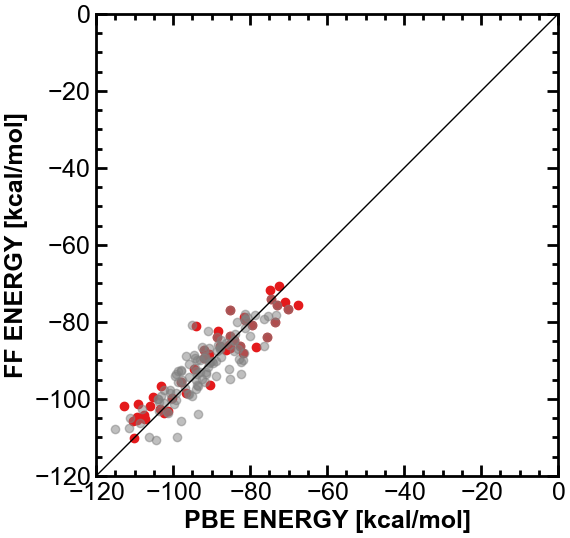

In [47]:
plt.scatter(
          datacopy.intE,
    datacopy.fitE + datacopy.ELEC
           )
plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELECp,  c="gray", alpha=0.5)

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")
# plt.savefig("water_ci_test.png")

In [48]:
datacopy["POT"] = ["POT" in _ for _ in datacopy.index]

In [49]:
datacopy["residuals"] = datacopy.intE - (datacopy.fitE + datacopy.ELEC)
print(datacopy[datacopy["POT"]]["residuals"].std())
np.sqrt(np.sum(datacopy[datacopy["POT"]]["residuals"]**2)/len(datacopy[datacopy["POT"]]))

5.204546940288987


5.136508332060738

In [50]:
print(datacopy[datacopy["POT"] == False]["residuals"].std())
np.sqrt(np.sum(datacopy[datacopy["POT"] == False]["residuals"]**2)/len(datacopy[datacopy["POT"] == False]))

3.23077749328499


4.4554190543519825

In [35]:
datacopy.ELEC + datacopy.EPOL

KEY
test0    -118.862363
test1    -127.525264
test2    -123.624245
test3    -123.658581
test4     -94.142098
test5    -138.048353
test6    -140.140754
test7    -102.955511
test8    -128.956009
test9    -119.479721
test10   -132.643511
test11   -124.962830
test12   -102.917665
test13   -116.993678
test14   -111.887659
test15   -112.025413
test16   -130.456218
test17    -98.583588
test18   -116.141396
test19   -124.857491
dtype: float64

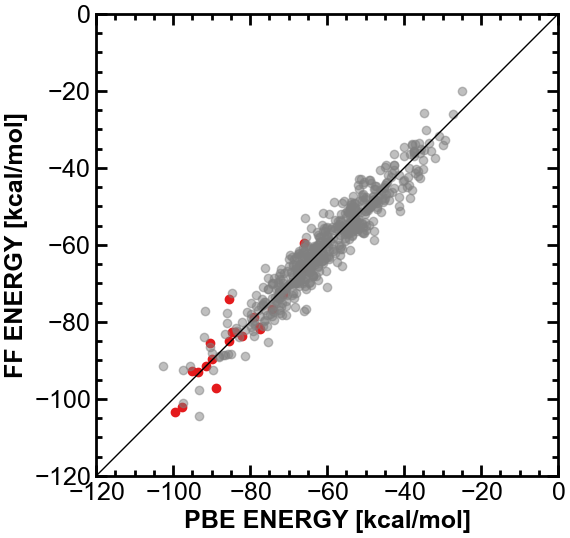

In [37]:
plt.scatter(datacopy.intE,
    datacopy.fitE + datacopy.ECI + datacopy.EPOL
            )
plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELECpol, c="gray", alpha=0.5)

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")
plt.savefig("water_pol_test.png")